In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
df = pd.read_csv("Assignment4Dataset.csv",header = None,names = ["x1","x2","y"])

In [3]:
df.shape

(5300, 3)

In [4]:
df.head()

,x1,x2,y
0,1.140,-0.114,-1
1,-1.520,-1.150,1
2,-1.050,0.720,-1
3,-0.916,0.397,1
4,-1.090,0.437,1


In [5]:
(df["y"]==1).sum()/df.shape[0]

0.4483018867924528

In [6]:
(df["y"]==-1).sum()/df.shape[0]

0.5516981132075471

In [7]:
df.describe()

,x1,x2,y
count,5300.000000,5300.000000,5300.000000
mean,0.000016,0.000018,-0.103396
std,0.999880,1.000038,0.994734
min,-3.090000,-2.390000,-1.000000
25%,-0.753250,-0.914000,-1.000000
50%,-0.015250,-0.037200,-1.000000
75%,0.782000,0.822500,1.000000
max,2.810000,3.190000,1.000000


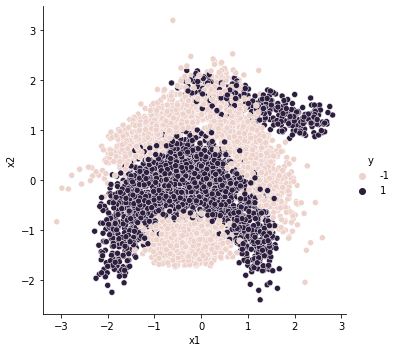

In [8]:
sns.relplot(data = df,x = "x1",y = "x2", hue = "y")

<font size = "4"><b> Adding extra features to data</b></font>

In [9]:
def fun(x):
    return x["x1"]*x["x2"]

df['x3'] = df['x1'].apply(lambda x: x*x)
df['x4'] = df['x2'].apply(lambda x: x*x)
df['x5'] = df.apply(lambda x: fun(x),axis = 1)

In [10]:
df.head()

,x1,x2,y,x3,x4,x5
0,1.140,-0.114,-1,1.299600,0.012996,-0.129960
1,-1.520,-1.150,1,2.310400,1.322500,1.748000
2,-1.050,0.720,-1,1.102500,0.518400,-0.756000
3,-0.916,0.397,1,0.839056,0.157609,-0.363652
4,-1.090,0.437,1,1.188100,0.190969,-0.476330


In [11]:
df.isna().sum()

x1    0
x2    0
y     0
x3    0
x4    0
x5    0
dtype: int64

In [12]:
X = df[["x1","x2","x3","x4","x5"]].to_numpy()
Y = df["y"].to_numpy().reshape(-1,1)

In [13]:
X.shape

(5300, 5)

In [14]:
Y.shape

(5300, 1)

In [15]:
X

array([[ 1.14    , -0.114   ,  1.2996  ,  0.012996, -0.12996 ],
       [-1.52    , -1.15    ,  2.3104  ,  1.3225  ,  1.748   ],
       [-1.05    ,  0.72    ,  1.1025  ,  0.5184  , -0.756   ],
       ...,
       [ 2.64    ,  1.14    ,  6.9696  ,  1.2996  ,  3.0096  ],
       [ 0.769   ,  0.772   ,  0.591361,  0.595984,  0.593668],
       [-0.255   , -0.142   ,  0.065025,  0.020164,  0.03621 ]])

In [16]:
x_train = X[:400]
y_train = Y[:400]

x_test = X[400:]
y_test = Y[400:]

In [17]:
n = x_train.shape[0]
d = x_train.shape[1]

<font size = "4"><b> Regression with only Empirical_Error</b></font>

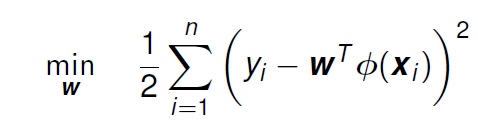

<font size = "3"><b> Direct_inverse</b></font>

In [19]:
def regression_inverse(x,y):
    xT = x.transpose()
    w = np.linalg.inv(xT @ x) @ xT @ y
    return w

In [20]:
w_regression_inverse = regression_inverse(x_train,y_train)
w_regression_inverse

array([[ 0.02128061],
       [-0.07705148],
       [ 0.05102616],
       [-0.2123949 ],
       [ 0.15064832]])

<font size = "3"><b> Steepest Grad Descent(Backtracking Line Search)</b></font>

In [21]:
def gradient_empirical(x,y,w):
    xT = x.transpose()
    return xT @ ((x @ w) - y)

def dot_product(x,y):
    return np.dot(np.transpose(x),y)[0][0]
def error_empirical(x,y,w):
    diff = (x @ w) - y
    return dot_product(diff,diff)/2

# Backtracking line search
def get_alpha(x,y,w,d):
    g = -d
    alpha = 0.5
    c1 = 1e-4
    p = 0.3
    while error_empirical(x,y,w+alpha*d) > (error_empirical(x,y,w) + c1*alpha*dot_product(g,d)):
        alpha = p*alpha
    return alpha

def regression_sd(x,y):
    
    (n,d) = x.shape
    T = 1
    # This is random
    w = np.random.rand(d,1)
    grad = gradient_empirical(x,y,w)
    df_error = pd.DataFrame(columns = ["Iteration","Error"])

    while np.linalg.norm(grad) > 1e-4:
        grad = gradient_empirical(x,y,w)
        err = error_empirical(x,y,w)
        
        df_error.loc[T-1] = [T,err]
        
        print("Error = ",err,"Gradient = ",np.linalg.norm(grad))
        
        dk = -grad
        alpha = get_alpha(x,y,w,dk)
        w = w + (alpha*dk)
        T = T+1
    return w,df_error

    

In [22]:
w_regression_sd,df_error_regression_sd = regression_sd(x_train,y_train)

Error =  671.8436473736621 Gradient =  1061.8195153888637
Error =  295.8428728741741 Gradient =  508.38828166153695
Error =  209.98919784547672 Gradient =  243.66041049775694
Error =  190.27063729085575 Gradient =  116.95520199541556
Error =  185.70231151965274 Gradient =  56.26983322145717
Error =  184.6293618060388 Gradient =  27.178591651670725
Error =  184.37174692594004 Gradient =  13.213947207077307
Error =  184.3077009390072 Gradient =  6.495133442114845
Error =  184.29092802298442 Gradient =  3.249055489960905
Error =  184.28621424595423 Gradient =  1.6685205006113581
Error =  184.28477379962487 Gradient =  0.8878147046670056
Error =  184.28429464018012 Gradient =  0.4925837410018984
Error =  184.28412313601046 Gradient =  0.285028960891131
Error =  184.28405828276976 Gradient =  0.17096962181857495
Error =  184.2840517437113 Gradient =  0.29237838226239304
Error =  184.284024121787 Gradient =  0.14073432768435962
Error =  184.2840176179052 Gradient =  0.06794749018017977
Error

In [23]:
w_regression_sd

array([[ 0.02128061],
       [-0.07705148],
       [ 0.05102613],
       [-0.21239493],
       [ 0.15064835]])

In [24]:
df_error_regression_sd.head()

,Iteration,Error
0,1.0,671.843647
1,2.0,295.842873
2,3.0,209.989198
3,4.0,190.270637
4,5.0,185.702312


<AxesSubplot:xlabel='Iteration', ylabel='Error'>

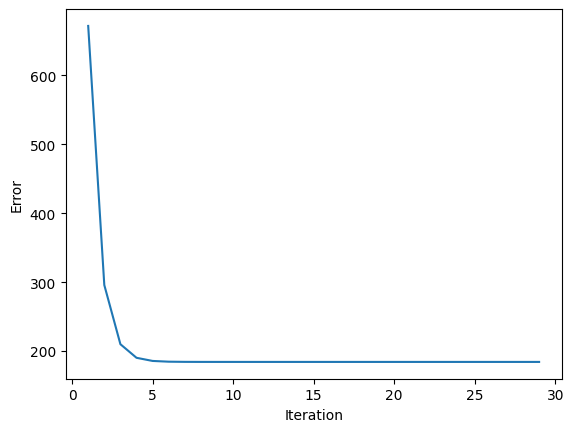

In [25]:
sns.lineplot(data = df_error_regression_sd,y = "Error",x = "Iteration")

<font size = "4"><b> Scaled Ridge Regression</b></font>

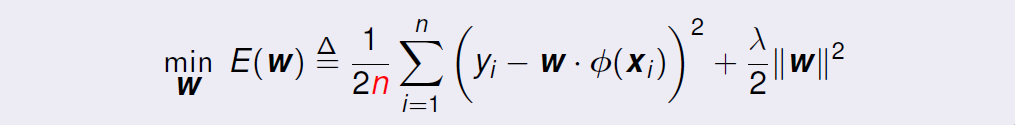

<font size = "3"><b> Direct_Inverse</b></font>

In [26]:
def ridge_inverse(x,y,lamda):
    (n,d) = x.shape
    xT = x.transpose()
    I = np.identity(d)
    w = np.linalg.inv((xT @ x)/n + lamda*I) @ (xT @ y)/n
    return w

In [27]:
w_ridge_inverse = ridge_inverse(x_train,y_train,5)

In [28]:
w_ridge_inverse

array([[ 0.00297723],
       [-0.01451782],
       [ 0.0033557 ],
       [-0.04252906],
       [ 0.01610793]])

<font size = "3"><b> Steepest Descent(Backtracking Line Search) </b></font>

In [90]:
def gradient_regularizer(w,lamda):
    return lamda*w

def gradient_ridge(x,y,w,lamda):
    n = x.shape[0]
    return gradient_empirical(x,y,w)/n + gradient_regularizer(w,lamda)

def error_regularizer(w,lamda):
    return (lamda * dot_product(w,w))/2

def error_ridge(x,y,w,lamda):
    return error_empirical(x,y,w)/n+error_regularizer(w,lamda)

# Backtracking line search
def get_alpha(x,y,w,d,lamda):
    g = -d
    alpha = 0.5
    c1 = 1e-4
    p = 0.3
    while error_ridge(x,y,w+alpha*d,lamda) > (error_ridge(x,y,w,lamda) + c1*alpha*dot_product(g,d)):
        alpha = p*alpha
    return alpha

def ridge_sd(x,y,lamda):
    # This is random
    w = np.random.rand(d,1)
    grad = gradient_ridge(x,y,w,lamda)
    T = 1
    df_error = pd.DataFrame(columns = ["Iteration","Error"])

    while np.linalg.norm(grad) > 1e-3 and T<50:
        grad = gradient_ridge(x,y,w,lamda)
        err = error_ridge(x,y,w,lamda)
        df_error.loc[T-1] = [T,err]
        #print("Error = ",err,"Gradient = ",np.linalg.norm(grad))
        dk = -grad
        alpha = get_alpha(x,y,w,dk,lamda)
        w = w + (alpha*dk)
        T = T+1
    print("Error = ",err,"Gradient = ",np.linalg.norm(grad))
    return w,df_error
    

In [91]:
def get_val_error(x_tr,y_tr,x_te,y_te,lamda,error_type,T,alpha,batch_size):
    if (error_type == "ridge_sd"):
        w,_ = ridge_sd(x_tr,y_tr,lamda)
    elif error_type == "ridge_sgd":
        w,_ = ridge_sgd(x_tr,y_tr,lamda,alpha,T)
    elif error_type == "ridge_mgd":
        w,_ = ridge_mgd(x_tr,y_tr,lamda,alpha,batch_size,T)
    return error_ridge(x_te,y_te,w,lamda)

def shuffle(x,y):
    xx = np.concatenate((x,y),axis = 1)
    np.random.shuffle(xx)
    x = xx[:,:-1]
    y = xx[:,-1].reshape(-1,1)
    return (x,y)

def k_fold_val_error(x,y,lamda,error_type,T = None,alpha = None,batch_size = None):
    (x,y) = shuffle(x,y)
    (n,d) = x.shape
    folds = 5
    fold_size = n//folds
    val_error = 0
    for i in range(folds):
        x_te = x[fold_size*i:fold_size*(i+1)]
        y_te = y[fold_size*i:fold_size*(i+1)]
        
        x_tr = np.concatenate((x[:fold_size*i],x[fold_size*(i+1):]),axis = 0)
        y_tr = np.concatenate((y[:fold_size*i],y[fold_size*(i+1):]),axis = 0)
        val_error = val_error + get_val_error(x_tr,y_tr,x_te,y_te,lamda,error_type,T,alpha,batch_size)
    return val_error/folds

In [92]:
df_ridge_sd_lamda = pd.DataFrame(columns = ["Lamda","Val_error"])
low_ld = 9*1e-5
hi_ld = 2*1e-4
r = 1.15
t = 1
while low_ld <= hi_ld:
    print("\nTraining data error of each fold == ")
    val_error = k_fold_val_error(x_train,y_train,low_ld,"ridge_sd")
    print("Lamda = ",low_ld,"Avg_val_error",val_error)
    df_ridge_sd_lamda.loc[t-1] = [low_ld,val_error]
    t = t+1
    low_ld = low_ld * r


Training data error of each fold == 
Error =  0.35740008417355906 Gradient =  0.0009955788499409323
Error =  0.3743575833656465 Gradient =  0.0008842870078211508
Error =  0.3646160375597614 Gradient =  0.0008737038643994173
Error =  0.37078781654256315 Gradient =  0.000702351385803591
Error =  0.3711891671517804 Gradient =  0.0008818354875363072
Lamda =  9e-05 Avg_val_error 0.09421391003612997

Training data error of each fold == 
Error =  0.3610982000060703 Gradient =  0.0007464108739602675
Error =  0.3635880844291816 Gradient =  0.0009918760911949624
Error =  0.3677447920625609 Gradient =  0.0007734330117099466
Error =  0.3723849358621004 Gradient =  0.000659962511031879
Error =  0.3703581712612071 Gradient =  0.000944073722821669
Lamda =  0.0001035 Avg_val_error 0.09564658959554088

Training data error of each fold == 
Error =  0.35757820238517524 Gradient =  0.0007306127197515037
Error =  0.3580699079703286 Gradient =  0.0009315081615663227
Error =  0.3779286190164447 Gradient =  

In [93]:
df_ridge_sd_lamda

,Lamda,Val_error
0,0.000090,0.094214
1,0.000103,0.095647
2,0.000119,0.095824
3,0.000137,0.093570
4,0.000157,0.094687
5,0.000181,0.095392


<AxesSubplot:xlabel='Lamda', ylabel='Val_error'>

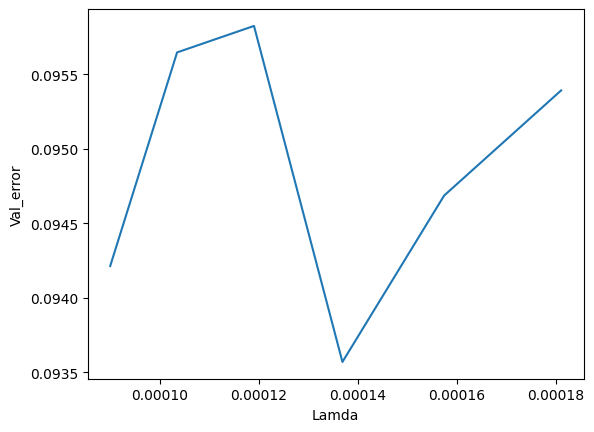

In [94]:
sns.lineplot(data = df_ridge_sd_lamda,y = "Val_error",x = "Lamda")

<b>So lamda = 14*1e-5</b>

In [95]:
lamda_sd = 14*(1e-5)
w_ridge_sd,df_error_ridge_sd = ridge_sd(x_train,y_train,lamda_sd) 

Error =  0.4607155538824289 Gradient =  0.0005898751481170736


In [96]:
df_error_ridge_sd

,Iteration,Error
0,1.0,1.446518
1,2.0,0.704460
2,3.0,0.523150
3,4.0,0.477205
4,5.0,0.465191
5,6.0,0.461962
6,7.0,0.461072
7,8.0,0.460820
8,9.0,0.460747
9,10.0,0.460725


In [97]:
error_ridge(x_train,y_train,w_ridge_sd,12*1e-5)

0.46071469938781806

In [98]:
error_ridge(x_test,y_test,w_ridge_sd,12*1e-5)

5.650968562821473

In [99]:
def test_accuracy(x,y,w):
    (n,d) = x.shape
    pred = n - (np.logical_xor((x @ w) > 0, y>0).sum())
    return (pred/n) * 100

In [100]:
test_accuracy(x_train,y_train,w_ridge_sd)

64.75

In [101]:
test_accuracy(x_test,y_test,w_ridge_sd)

64.12244897959184

<AxesSubplot:xlabel='Iteration', ylabel='Error'>

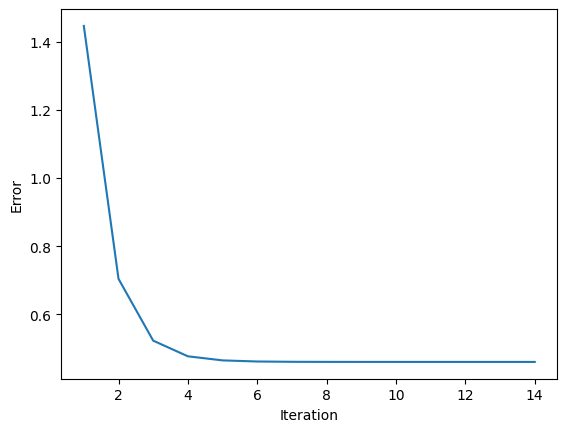

In [102]:
sns.lineplot(data = df_error_ridge_sd,y = "Error",x = "Iteration")

<font size = "3"><b> Stochastic Gradient Descent</b></font>

In [61]:
def gradient_stochastic(xi,yi,w,lamda):
    return -(yi - dot_product(w,xi))*xi + lamda * w

# lamda is regularizer
# alpha is learning rate
# T is number of epochs to run
def ridge_sgd(x,y,lamda,alpha,T):
    (n,d) = x.shape
    # This is random
    w = np.random.rand(d,1)
    df_error = pd.DataFrame(columns = ["Iteration","Error"])
    for t in range(1,T):
        err = error_ridge(x,y,w,lamda)
        df_error.loc[t-1] = [t,err]
        #print("Error = ",err)
        i = random.randint(0, n-1)
        xi = x[i].reshape(-1,1)
        grad = gradient_stochastic(xi,y[i],w,lamda)
        dk = -grad
        alpha = 1/(lamda*t)
        w = w + alpha * dk

    print("Error = ",err,"Gradient = ",np.linalg.norm(grad))
    return w,df_error

In [62]:
df_ridge_sgd_lamda = pd.DataFrame(columns = ["Lamda","Val_error"])
low_ld = 1e-2
hi_ld = 1e+5
r = 10
t = 1
while low_ld <= hi_ld:
    print("\nTraining data error of each fold == ")
    val_error = k_fold_val_error(x_train,y_train,low_ld,"ridge_sgd",20,0.3)
    print("Lamda = ",low_ld,"Avg_val_error",val_error)
    df_ridge_sgd_lamda.loc[t-1] = [low_ld,val_error]
    t = t+1
    low_ld = low_ld * r


Training data error of each fold == 
Error =  2.3072795547841498e+42 Gradient =  2.8048813679306285e+21
Error =  1.3056205261113872e+39 Gradient =  1.9180994233521818e+18
Error =  5.471985805346994e+30 Gradient =  4027292502868350.5
Error =  1.5297930418284008e+31 Gradient =  216521413960184.22
Error =  1.0863634755658442e+38 Gradient =  4.196852988509018e+18
Lamda =  0.01 Avg_val_error 4.5208091412129885e+42

Training data error of each fold == 
Error =  110536259815583.44 Gradient =  3136499.1278485055
Error =  1731565970583294.0 Gradient =  6252188.813567106
Error =  49655895.96900529 Gradient =  3998.9024164325665
Error =  1.3175050288148317e+17 Gradient =  59775544.45439979
Error =  507387764178965.8 Gradient =  55366991.64722285
Lamda =  0.1 Avg_val_error 6362539342401069.0

Training data error of each fold == 
Error =  1.9635094655403544 Gradient =  4.2236889527899315
Error =  0.585111595624026 Gradient =  7.804060237033529
Error =  0.5170498667383994 Gradient =  6.671825130976

In [63]:
df_ridge_sgd_lamda

,Lamda,Val_error
0,0.01,4.520809e+42
1,0.10,6.362539e+15
2,1.00,5.196508e-01
3,10.00,1.235304e-01
4,100.00,1.026898e-01
5,1000.00,1.003486e-01
6,10000.00,1.000272e-01
7,100000.00,1.000035e-01


<AxesSubplot:xlabel='Lamda', ylabel='Val_error'>

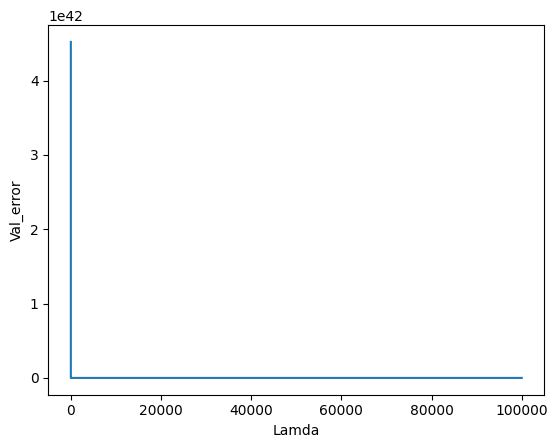

In [64]:
sns.lineplot(data = df_ridge_sgd_lamda,y = "Val_error",x = "Lamda")

<b>so lamda = 1e+5</b>

In [65]:
lamda_sgd = 100
alpha_sgd = 0.01
T_sgd = 50
w_ridge_sgd,df_error_ridge_sgd = ridge_sgd(x_train,y_train,lamda_sgd,alpha_sgd,T_sgd)

Error =  0.49977941473934095 Gradient =  1.943233951812201


In [66]:
error_ridge(x_test,y_test,w_ridge_sgd,1e+5)

7.219960838434721

In [67]:
error_ridge(x_train,y_train,w_ridge_sgd,1e+5)

1.6079149545971376

In [68]:
test_accuracy(x_test,y_test,w_ridge_sgd)

56.97959183673469

In [69]:
test_accuracy(x_train,y_train,w_ridge_sgd)

59.75

<AxesSubplot:xlabel='Iteration', ylabel='Error'>

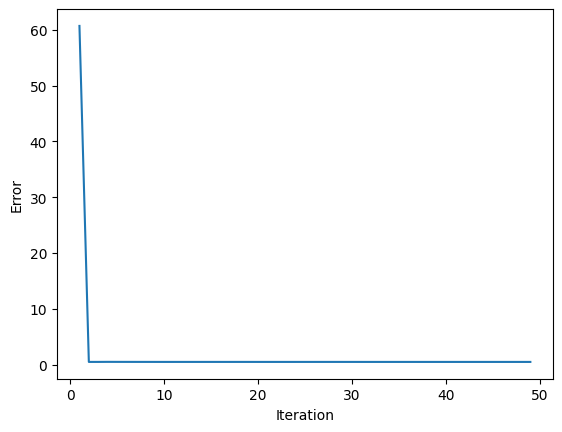

In [70]:
sns.lineplot(data = df_error_ridge_sgd,y = "Error",x = "Iteration")

<font size = "3"><b> Mini_Batch Gradient Descent </b></font>

In [71]:
def get_random(x,y,k):
    (n,d) = x.shape
    indices = np.random.randint(n,size = k)
    xk = x[indices]
    yk = y[indices]
    return xk,yk

def ridge_mgd(x,y,lamda,alpha,batch_size,T):
    (n,d) = x.shape
    # This is random
    w = np.random.rand(d,1)
    df_error = pd.DataFrame(columns = ["Iteration","Error"])
    for t in range(1,T):
        err = error_ridge(x,y,w,lamda)
        df_error.loc[t-1] = [t,err]
        xk,yk = get_random(x,y,batch_size)
        grad = gradient_ridge(x,y,w,lamda)
        dk = -grad
        alpha = 1/(lamda*t)
        w = w + alpha * dk

    print("Error = ",err,"Gradient = ",np.linalg.norm(grad))
    return w,df_error

In [72]:
df_ridge_mgd_lamda = pd.DataFrame(columns = ["Lamda","Val_error"])
low_ld = 1e+1
hi_ld = 1e+3
r = 2
t = 1
while low_ld <= hi_ld:
    print("\nTraining data error of each fold == ")
    val_error = k_fold_val_error(x_train,y_train,low_ld,"ridge_mgd",20,0.3,10)
    print("Lamda = ",low_ld,"Val_error",val_error)
    df_ridge_mgd_lamda.loc[t-1] = [low_ld,val_error]
    t = t+1
    low_ld = low_ld * r


Training data error of each fold == 
Error =  0.398512714829705 Gradient =  0.07576214005717426
Error =  0.39674923495341985 Gradient =  0.07573933032701823
Error =  0.39779268083932817 Gradient =  0.07569017488733835
Error =  0.3975893523492212 Gradient =  0.07886350020751563
Error =  0.3978968196015962 Gradient =  0.094723598783492
Lamda =  10.0 Val_error 0.10329144162698926

Training data error of each fold == 
Error =  0.3990416412975257 Gradient =  0.08653157122087278
Error =  0.3987790621407138 Gradient =  0.11568304365309598
Error =  0.3994434422072539 Gradient =  0.13244413507292804
Error =  0.3987043839341219 Gradient =  0.10064768650956432
Error =  0.3987870532174308 Gradient =  0.07924658198860153
Lamda =  20.0 Val_error 0.10197022184206106

Training data error of each fold == 
Error =  0.3996537611108709 Gradient =  0.12604074895211803
Error =  0.3995255682103545 Gradient =  0.10030181267212507
Error =  0.39985678558449544 Gradient =  0.19393140039344892
Error =  0.3994400

In [73]:
df_ridge_mgd_lamda

,Lamda,Val_error
0,10.0,0.103291
1,20.0,0.101970
2,40.0,0.101269
3,80.0,0.100656
4,160.0,0.100425
5,320.0,0.100211
6,640.0,0.100079


<AxesSubplot:xlabel='Lamda', ylabel='Val_error'>

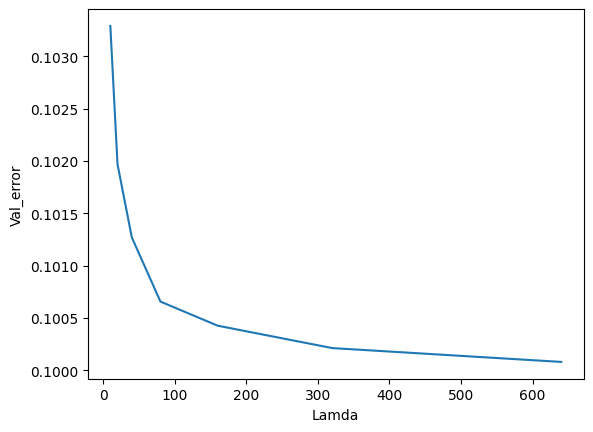

In [74]:
sns.lineplot(data = df_ridge_mgd_lamda,y = "Val_error",x = "Lamda")

<b>So lamda = 500</b>

In [75]:
lamda_mgd = 500
alpha_mgd = 0.08
batch_mgd = 20
T_mgd = 10
w_ridge_mgd, df_error_ridge_mgd = ridge_mgd(x_train,y_train,500,0.01,20,10)

Error =  0.5000444037179712 Gradient =  0.3711633782881404


In [76]:
w_ridge_mgd

array([[-1.17921469e-04],
       [-3.95527678e-04],
       [-4.71411602e-04],
       [-8.53423216e-04],
       [-8.26770815e-05]])

In [77]:
test_accuracy(x_test,y_test,w_ridge_mgd)

57.224489795918366

In [78]:
test_accuracy(x_train,y_train,w_ridge_mgd)

58.25

<font size = "3"><b>Visualizing hypothesis funtion</b></font>

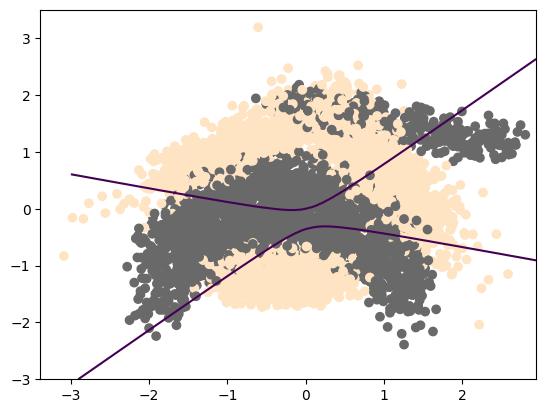

In [79]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y,w):
    return w[2]*x**2+w[4]*x*y+w[3]*y**2+w[0]*x+w[1]*y

xx = np.arange(-3.0,3.0,0.07)
yy = np.arange(-3.0,3.0,0.07)
XX, YY = np.meshgrid(xx,yy)
plt.contour(xx, yy, f(XX, YY,w_ridge_sd),levels = [0])
colors = {1 : "dimgrey",-1 : "bisque"}
plt.scatter(x_test[:,0],x_test[:,1],c=df["y"][400:].apply(lambda x: colors[x]))
#sns.relplot(data = df,x = "x1",y = "x2", hue = "y")
plt.show()

In [104]:
grid = []
for i in np.arange(-3, 3.01, 0.1):
    for j in np.arange(-3, 3.01, 0.1):
        grid.append([i,j])

grid_df = pd.DataFrame(grid, columns=['x1', 'x2'])

grid_df['x3'] = grid_df['x1']**2
grid_df['x4'] = grid_df['x2']**2
grid_df['x5'] = grid_df['x1']*grid_df['x2']

In [105]:
plt.scatter(X[:,0][Y.ravel()==-1], X[:,1][Y.ravel()==-1], s=3, c='r')
plt.scatter(X[:,0][Y.ravel()==1], X[:,1][Y.ravel()==1], s=3, c='b')
plt.savefig('Grid_Predictions/original_grid.jpg')
# plt.show()
plt.close()

x_grid = grid_df.to_numpy()
y_grid = np.dot(x_grid, w_ridge_mgd)
y_grid = np.array([1 if y_grid[i] > 0 else -1 for i in range(len(y_grid))])
plt.scatter(x_grid[:,0][y_grid==-1], x_grid[:,1][y_grid==-1], s=3, c='r')
plt.scatter(x_grid[:,0][y_grid==1], x_grid[:,1][y_grid==1], s=3, c='b')
plt.savefig('Grid_Predictions/mini_batch_grid.jpg')
plt.close()

x_grid = grid_df.to_numpy()
y_grid = np.dot(x_grid, w_ridge_sgd)
y_grid = np.array([1 if y_grid[i] > 0 else -1 for i in range(len(y_grid))])
plt.scatter(x_grid[:,0][y_grid==-1], x_grid[:,1][y_grid==-1], s=3, c='r')
plt.scatter(x_grid[:,0][y_grid==1], x_grid[:,1][y_grid==1], s=3, c='b')
plt.savefig('Grid_Predictions/sgd_grid.jpg')
plt.close()

x_grid = grid_df.to_numpy()
y_grid = np.dot(x_grid, w_ridge_sd)
y_grid = np.array([1 if y_grid[i] > 0 else -1 for i in range(len(y_grid))])
plt.scatter(x_grid[:,0][y_grid==-1], x_grid[:,1][y_grid==-1], s=3, c='r')
plt.scatter(x_grid[:,0][y_grid==1], x_grid[:,1][y_grid==1], s=3, c='b')
plt.savefig('Grid_Predictions/steep_gd_grid.jpg')
plt.close()

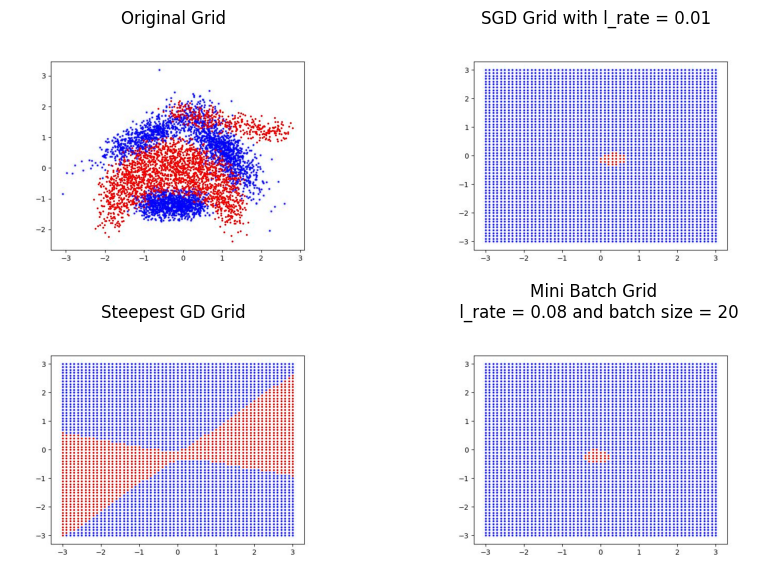

In [106]:
Image1 = cv2.imread('Grid_Predictions/original_grid.jpg')
Image2 = cv2.imread('Grid_Predictions/sgd_grid.jpg')
Image3 = cv2.imread('Grid_Predictions/steep_gd_grid.jpg')
Image4 = cv2.imread('Grid_Predictions/mini_batch_grid.jpg')

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Grid")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("SGD Grid with l_rate = {}".format(alpha_sgd))
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Steepest GD Grid")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Mini Batch Grid \n l_rate = {} and batch size = {}".format(alpha_mgd,batch_mgd))
print()

<font size = 5><b>Fletcher Reeves method</b></font>

In [107]:
X.shape

(5300, 5)

In [108]:
from numpy.linalg import matrix_rank
matrix_rank(X)

5

<font size = 5>(XT)X is positive definite symmetric matrix</font>

In [109]:
def fletcher_reeves(x,y,lamda):
    (n,d) = x.shape
    H = ((np.transpose(x) @ x)/n) + (np.identity(d)*lamda)
    c = (np.transpose(x) @ y)/n
    
    # This is random
    wk = np.random.rand(d,1)
    gk = gradient_ridge(x,y,wk,lamda) 
    dk = -gk
    
    k = 0
    while np.linalg.norm(gk) > 1e-3:
        
        alphak = -(dot_product(gk,dk))/dot_product(dk,H @ dk)
        wk_1 = wk+alphak*dk
        
        gk_1 = (H @ wk_1)-c
        betak = dot_product(gk_1,gk_1)/dot_product(gk,gk)
        dk_1 = -gk_1 + betak * dk
        
        k = k+1
        wk = wk_1
        gk = gk_1
        dk = dk_1
    print("Iterations = ",k)
    return wk

In [110]:
lamda_fr = 0.1
w_fr = fletcher_reeves(x_train,y_train,lamda_fr)

Iterations =  4


In [111]:
error_ridge(x_test,y_test,w_fr,3)

5.744117949377983

In [112]:
test_accuracy(x_test,y_test,w_fr)

64.22448979591837

In [113]:
test_accuracy(x_train,y_train,w_fr)

64.75

In [114]:
x_grid = grid_df.to_numpy()
y_grid = np.dot(x_grid, w_fr)
y_grid = np.array([1 if y_grid[i] > 0 else -1 for i in range(len(y_grid))])
plt.scatter(x_grid[:,0][y_grid==-1], x_grid[:,1][y_grid==-1], s=3, c='r')
plt.scatter(x_grid[:,0][y_grid==1], x_grid[:,1][y_grid==1], s=3, c='b')
plt.savefig('Grid_Predictions/Fletcher_Reeves.jpg')
plt.close()

Text(0.5, 1.0, 'Fletcher Reeves Grid with lamda = 0.1')

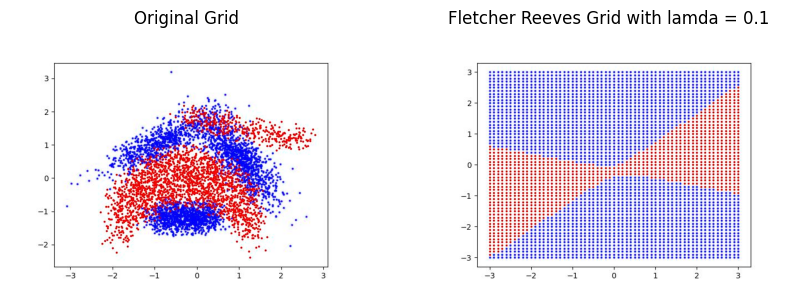

In [115]:
Image1 = cv2.imread('Grid_Predictions/original_grid.jpg')
Image2 = cv2.imread('Grid_Predictions/Fletcher_Reeves.jpg')

# create figure
fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
rows = 1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original Grid")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("Fletcher Reeves Grid with lamda = {}".format(lamda_fr))